# Data Intensive Computing Project-Phase_2

# Authors:
Praneeth Bhojanala

Hemanth Naga Pavan Kumar Swarna

Sree Charan Battula

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Loading the preprocessed data from phase 1

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4472 non-null   int64  
 1   Age                      4472 non-null   float64
 2   Hypertension             4472 non-null   float64
 3   Heart_disease            4472 non-null   float64
 4   Glucose_level            4472 non-null   float64
 5   Bmi                      4472 non-null   float64
 6   Stroke                   4472 non-null   int64  
 7   Gender_male              4472 non-null   float64
 8   Gender_other             4472 non-null   float64
 9   Ever_married_yes         4472 non-null   int64  
 10  Work_type_government     4472 non-null   int64  
 11  Work_type_never_worked   4472 non-null   int64  
 12  Work_type_private        4472 non-null   int64  
 13  Work_type_self-employed  4472 non-null   int64  
 14  Residence_type_urban    

In [4]:
df.describe()

,Unnamed: 0,Age,Hypertension,Heart_disease,Glucose_level,Bmi,Stroke,Gender_male,Gender_other,Ever_married_yes,Work_type_government,Work_type_never_worked,Work_type_private,Work_type_self-employed,Residence_type_urban,Smoking_status_former,Smoking_status_never,Smoking_status_unknown
count,4472.000000,4472.000000,4472.00000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000
mean,2591.480098,40.887156,0.07424,0.038685,91.450429,28.224217,0.036896,0.405635,0.000224,0.624329,0.126118,0.004919,0.568649,0.149374,0.507379,0.161896,0.364267,0.321333
std,1458.231176,22.405987,0.26219,0.192865,22.630034,7.264055,0.188528,0.491069,0.014954,0.484350,0.332020,0.069974,0.495320,0.356496,0.500001,0.368397,0.481278,0.467040
min,2.000000,0.080000,0.00000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1323.750000,23.000000,0.00000,0.000000,75.077500,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2601.500000,42.000000,0.00000,0.000000,87.980000,27.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3853.250000,58.000000,0.00000,0.000000,103.925000,32.300000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5109.000000,82.000000,1.00000,1.000000,168.680000,59.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

Unnamed: 0                 0
Age                        0
Hypertension               0
Heart_disease              0
Glucose_level              0
Bmi                        0
Stroke                     0
Gender_male                0
Gender_other               0
Ever_married_yes           0
Work_type_government       0
Work_type_never_worked     0
Work_type_private          0
Work_type_self-employed    0
Residence_type_urban       0
Smoking_status_former      0
Smoking_status_never       0
Smoking_status_unknown     0
dtype: int64

In [6]:
df.nunique()

Unnamed: 0                 4472
Age                         104
Hypertension                  2
Heart_disease                 2
Glucose_level              3365
Bmi                         485
Stroke                        2
Gender_male                   2
Gender_other                  2
Ever_married_yes              2
Work_type_government          2
Work_type_never_worked        2
Work_type_private             2
Work_type_self-employed       2
Residence_type_urban          2
Smoking_status_former         2
Smoking_status_never          2
Smoking_status_unknown        2
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Age,Hypertension,Heart_disease,Glucose_level,Bmi,Stroke,Gender_male,Gender_other,Ever_married_yes,Work_type_government,Work_type_never_worked,Work_type_private,Work_type_self-employed,Residence_type_urban,Smoking_status_former,Smoking_status_never,Smoking_status_unknown
0,2,80.0,0.0,1.0,105.92,32.5,1,1.0,0.0,1,0,0,1,0,0,0,1,0
1,6,74.0,1.0,1.0,70.09,27.4,1,1.0,0.0,1,0,0,1,0,0,0,1,0
2,7,69.0,0.0,0.0,94.39,22.8,1,0.0,0.0,0,0,0,1,0,1,0,1,0
3,8,59.0,0.0,0.0,76.15,26.4,1,0.0,0.0,1,0,0,1,0,0,0,0,1
4,9,78.0,0.0,0.0,58.57,24.2,1,0.0,0.0,1,0,0,1,0,1,0,0,1


In [8]:
df.tail()

,Unnamed: 0,Age,Hypertension,Heart_disease,Glucose_level,Bmi,Stroke,Gender_male,Gender_other,Ever_married_yes,Work_type_government,Work_type_never_worked,Work_type_private,Work_type_self-employed,Residence_type_urban,Smoking_status_former,Smoking_status_never,Smoking_status_unknown
4467,5105,80.0,1.0,0.0,83.75,27.12,0,0.0,0.0,1,0,0,1,0,1,0,1,0
4468,5106,81.0,0.0,0.0,125.20,40.00,0,0.0,0.0,1,0,0,0,1,1,0,1,0
4469,5107,35.0,0.0,0.0,82.99,30.60,0,0.0,0.0,1,0,0,0,1,0,0,1,0
4470,5108,51.0,0.0,0.0,166.29,25.60,0,1.0,0.0,1,0,0,1,0,0,1,0,0
4471,5109,44.0,0.0,0.0,85.28,26.20,0,0.0,0.0,1,1,0,0,0,1,0,0,1


# Performing SMOTE to tackle class imbalance

In [9]:
X0 = df.drop(columns=['Stroke']) # Features
y0 = df['Stroke'] # Target
# Check the distribution of the target variable
print(y0.value_counts())

Stroke
0    4307
1     165
Name: count, dtype: int64


In [10]:
# Setting a ratio for the minority class for balancing
smote = SMOTE(sampling_strategy=0.35, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X0, y0)
print("New class distribution after SMOTE:",y_resampled.value_counts())
print()

New class distribution after SMOTE: Stroke
0    4307
1    1507
Name: count, dtype: int64



In [11]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5814 non-null   int64  
 1   Age                      5814 non-null   float64
 2   Hypertension             5814 non-null   float64
 3   Heart_disease            5814 non-null   float64
 4   Glucose_level            5814 non-null   float64
 5   Bmi                      5814 non-null   float64
 6   Gender_male              5814 non-null   float64
 7   Gender_other             5814 non-null   float64
 8   Ever_married_yes         5814 non-null   int64  
 9   Work_type_government     5814 non-null   int64  
 10  Work_type_never_worked   5814 non-null   int64  
 11  Work_type_private        5814 non-null   int64  
 12  Work_type_self-employed  5814 non-null   int64  
 13  Residence_type_urban     5814 non-null   int64  
 14  Smoking_status_former   

In [12]:
X_resampled.nunique()

Unnamed: 0                 4550
Age                        1352
Hypertension                493
Heart_disease               305
Glucose_level              4707
Bmi                        1822
Gender_male                 630
Gender_other                  2
Ever_married_yes              2
Work_type_government          2
Work_type_never_worked        2
Work_type_private             2
Work_type_self-employed       2
Residence_type_urban          2
Smoking_status_former         2
Smoking_status_never          2
Smoking_status_unknown        2
dtype: int64

In [13]:
y_resampled.head()

0    1
1    1
2    1
3    1
4    1
Name: Stroke, dtype: int64

In [14]:
y_resampled.nunique()

2

# Rounding the synthetic values to the nearest unique values from the original dataframe

In [15]:
# For continuous columns like age, BMI, and glucose level, no rounding or mapping is needed

# Fixing other columns that are not continuous
for col in X0.columns:
    if col not in ['Age', 'Bmi', 'Glucose_level']:
        unique_values = df[col].unique()
        X_resampled[col] = X_resampled[col].apply(lambda x: min(unique_values, key=lambda y: abs(y - x)))


In [16]:
# Rounding the 'age' column to the nearest integer
X_resampled['Age'] = X_resampled['Age'].round(0)
X_resampled['Age'] = X_resampled['Age'].astype(float)

In [17]:
X_resampled.nunique()

Unnamed: 0                 4472
Age                          83
Hypertension                  2
Heart_disease                 2
Glucose_level              4707
Bmi                        1822
Gender_male                   2
Gender_other                  2
Ever_married_yes              2
Work_type_government          2
Work_type_never_worked        2
Work_type_private             2
Work_type_self-employed       2
Residence_type_urban          2
Smoking_status_former         2
Smoking_status_never          2
Smoking_status_unknown        2
dtype: int64

# Feature Selection

# Using Random Forest and Logistic Regression to see the top 10 important features before final feature selection

<Figure size 1200x800 with 0 Axes>

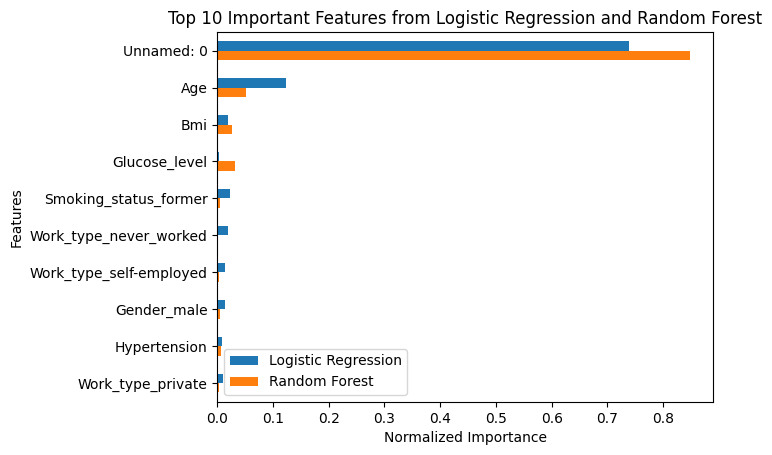

In [18]:
X1 = df.drop(columns=['Stroke'])  # Features
y1 = df['Stroke']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y1, test_size=0.3, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train1, y_train1)

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train1, y_train1)

# Getting feature importance from Logistic Regression (absolute values of coefficients)
log_reg_importance = pd.Series(abs(log_reg.coef_[0]), index=X1.columns)

# Getting feature importance from Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=X1.columns)

# Combining both importances into a DataFrame
importance_df = pd.DataFrame({
    'Logistic Regression': log_reg_importance,
    'Random Forest': rf_importance
})

# Normalizing the feature importance scores for better comparison
importance_df['Logistic Regression'] = importance_df['Logistic Regression'] / importance_df['Logistic Regression'].sum()
importance_df['Random Forest'] = importance_df['Random Forest'] / importance_df['Random Forest'].sum()

# Sorting by the sum of importance scores from both models
importance_df['Total Importance'] = importance_df['Logistic Regression'] + importance_df['Random Forest']
importance_df = importance_df.sort_values(by='Total Importance', ascending=False)

# Plotring the top 10 features
plt.figure(figsize=(12, 8))
importance_df[['Logistic Regression', 'Random Forest']].head(10).plot(kind='barh', stacked=False)
plt.title("Top 10 Important Features from Logistic Regression and Random Forest")
plt.xlabel("Normalized Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  

# Removing less relvant features and also some high relevant features to generalize our model better

In [19]:
df2 = X_resampled.drop(columns=['Smoking_status_unknown', 'Residence_type_urban', 'Unnamed: 0', 'Gender_other', 'Ever_married_yes', 
                    'Work_type_government', 'Work_type_never_worked', 
                    'Work_type_private', 'Work_type_self-employed', 
                    'Smoking_status_former', 'Smoking_status_never'])
df2['Stroke'] = y_resampled
# we are only keeping medical and simple demographical features like gender, age, hypertension, glucose_level, bmi as our features

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            5814 non-null   float64
 1   Hypertension   5814 non-null   float64
 2   Heart_disease  5814 non-null   float64
 3   Glucose_level  5814 non-null   float64
 4   Bmi            5814 non-null   float64
 5   Gender_male    5814 non-null   float64
 6   Stroke         5814 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 318.1 KB


In [21]:
df2.describe()

,Age,Hypertension,Heart_disease,Glucose_level,Bmi,Gender_male,Stroke
count,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000
mean,47.064155,0.108531,0.056072,91.383667,28.368806,0.407637,0.259202
std,23.415370,0.311077,0.230080,22.472588,6.679901,0.491437,0.438234
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,75.006511,24.050754,0.000000,0.000000
50%,50.000000,0.000000,0.000000,87.925000,27.935613,0.000000,0.000000
75%,67.000000,0.000000,0.000000,103.935000,32.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,168.680000,59.700000,1.000000,1.000000


In [22]:
df2.nunique()

Age                83
Hypertension        2
Heart_disease       2
Glucose_level    4707
Bmi              1822
Gender_male         2
Stroke              2
dtype: int64

In [23]:
df2.isnull().sum()

Age              0
Hypertension     0
Heart_disease    0
Glucose_level    0
Bmi              0
Gender_male      0
Stroke           0
dtype: int64

# Seperating Features and Target Attribute

In [24]:
X = df2.drop(columns=['Stroke']) # Features
y = df2['Stroke'] # Target

# Scale the features

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing [Using 70, 30 split to avoid overfitting. Having more unseen data makes the model generalize better]

In [26]:
# Splitting the resampled data into 70% training and 30% testing to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4069, 6)
X_test shape: (1745, 6)
y_train shape: (4069,)
y_test shape: (1745,)


# Fitting Classifier models

In [27]:
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

# ROC-AUC for '1' class
print(f"AUC-ROC for Logistic Regression: {roc_auc_score(y_test, y_pred_proba):.4f}")
print('-' * 50)


Confusion Matrix for Logistic Regression:
[[1133  154]
 [ 195  263]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

No Stroke (0)       0.85      0.88      0.87      1287
   Stroke (1)       0.63      0.57      0.60       458

     accuracy                           0.80      1745
    macro avg       0.74      0.73      0.73      1745
 weighted avg       0.79      0.80      0.80      1745

AUC-ROC for Logistic Regression: 0.8566
--------------------------------------------------


In [28]:
# 2. SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

# ROC-AUC for '1' class
print(f"AUC-ROC for SVM: {roc_auc_score(y_test, y_pred_proba):.4f}")
print('-' * 50)


Confusion Matrix for SVM:
[[1157  130]
 [ 176  282]]
Classification Report for SVM:
               precision    recall  f1-score   support

No Stroke (0)       0.87      0.90      0.88      1287
   Stroke (1)       0.68      0.62      0.65       458

     accuracy                           0.82      1745
    macro avg       0.78      0.76      0.77      1745
 weighted avg       0.82      0.82      0.82      1745

AUC-ROC for SVM: 0.8698
--------------------------------------------------


In [29]:
# 3. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

print('-' * 50)

Confusion Matrix for KNN:
[[1118  169]
 [  77  381]]
Classification Report for KNN:
               precision    recall  f1-score   support

No Stroke (0)       0.94      0.87      0.90      1287
   Stroke (1)       0.69      0.83      0.76       458

     accuracy                           0.86      1745
    macro avg       0.81      0.85      0.83      1745
 weighted avg       0.87      0.86      0.86      1745

--------------------------------------------------


In [30]:
# 4. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

# ROC-AUC for '1' class
print(f"AUC-ROC for Naive Bayes: {roc_auc_score(y_test, y_pred_proba):.4f}")
print('-' * 50)


Confusion Matrix for Naive Bayes:
[[1158  129]
 [ 282  176]]
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

No Stroke (0)       0.80      0.90      0.85      1287
   Stroke (1)       0.58      0.38      0.46       458

     accuracy                           0.76      1745
    macro avg       0.69      0.64      0.66      1745
 weighted avg       0.74      0.76      0.75      1745

AUC-ROC for Naive Bayes: 0.8434
--------------------------------------------------


In [31]:
# 5. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

# ROC-AUC for '1' class
print(f"AUC-ROC for Random Forest: {roc_auc_score(y_test, y_pred_proba):.4f}")
print('-' * 50)

Confusion Matrix for Random Forest:
[[1194   93]
 [  99  359]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

No Stroke (0)       0.92      0.93      0.93      1287
   Stroke (1)       0.79      0.78      0.79       458

     accuracy                           0.89      1745
    macro avg       0.86      0.86      0.86      1745
 weighted avg       0.89      0.89      0.89      1745

AUC-ROC for Random Forest: 0.9444
--------------------------------------------------


In [32]:
# 6. XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

# ROC-AUC for '1' class
print(f"AUC-ROC for XGBoost: {roc_auc_score(y_test, y_pred_proba):.4f}")
print('-' * 50)

Confusion Matrix for XGBoost:
[[1171  116]
 [ 114  344]]
Classification Report for XGBoost:
               precision    recall  f1-score   support

No Stroke (0)       0.91      0.91      0.91      1287
   Stroke (1)       0.75      0.75      0.75       458

     accuracy                           0.87      1745
    macro avg       0.83      0.83      0.83      1745
 weighted avg       0.87      0.87      0.87      1745

AUC-ROC for XGBoost: 0.9315
--------------------------------------------------


# Fine Tuning our models

In [33]:

X_train_df = pd.DataFrame(X_train)  
y_train_df = pd.Series(y_train).reset_index(drop=True) 

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
nb_params = {'var_smoothing': np.logspace(0, -9, num=100)}
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean']}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

classifiers = {
    'Logistic Regression': GridSearchCV(LogisticRegression(random_state=42), param_grid=log_reg_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1),
    'SVM': GridSearchCV(SVC(probability=True, random_state=42), param_grid=svm_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1),
    'KNN': GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1),
    'Naive Bayes': GridSearchCV(GaussianNB(), param_grid=nb_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1),
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1),
    'XGBoost': GridSearchCV(XGBClassifier(random_state=42), param_grid=xgb_params, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
}

for name, clf in classifiers.items():
    print(f"\n{name}:")
    
    roc_auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cumulative_conf_matrix = np.zeros((2, 2))
    
    fold_number = 1
    for train_index, test_index in kf.split(X_train_df, y_train_df):
        X_fold_train, X_fold_test = X_train_df.iloc[train_index].reset_index(drop=True), X_train_df.iloc[test_index].reset_index(drop=True)
        y_fold_train, y_fold_test = y_train_df.iloc[train_index].reset_index(drop=True), y_train_df.iloc[test_index].reset_index(drop=True)
        
        clf.fit(X_fold_train, y_fold_train)
        
        if isinstance(clf, GridSearchCV):
            clf = clf.best_estimator_
            print(f"Best parameters for {name}: {clf.get_params()}")
        
        # Make predictions on the fold's test data
        y_pred = clf.predict(X_fold_test)
        y_pred_proba = clf.predict_proba(X_fold_test)[:, 1] 
        
        roc_auc = roc_auc_score(y_fold_test, y_pred_proba)
        precision = precision_score(y_fold_test, y_pred)
        recall = recall_score(y_fold_test, y_pred)
        f1 = f1_score(y_fold_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        cumulative_conf_matrix += confusion_matrix(y_fold_test, y_pred)
        
        print(f"  Fold {fold_number}:")
        print(f"    ROC-AUC: {roc_auc:.4f}")
        print(f"    Precision: {precision:.4f}")
        print(f"    Recall: {recall:.4f}")
        print(f"    F1-Score: {f1:.4f}")
        print(f"    Confusion Matrix:\n{confusion_matrix(y_fold_test, y_pred)}\n")
        
        fold_number += 1
    
    print(f"ROC-AUC: Mean: {np.mean(roc_auc_scores):.4f}, Best: {np.max(roc_auc_scores):.4f}, Std Dev: {np.std(roc_auc_scores):.4f}")
    print(f"Precision: Mean: {np.mean(precision_scores):.4f}, Best: {np.max(precision_scores):.4f}, Std Dev: {np.std(precision_scores):.4f}")
    print(f"Recall: Mean: {np.mean(recall_scores):.4f}, Best: {np.max(recall_scores):.4f}, Std Dev: {np.std(recall_scores):.4f}")
    print(f"F1-Score: Mean: {np.mean(f1_scores):.4f}, Best: {np.max(f1_scores):.4f}, Std Dev: {np.std(f1_scores):.4f}")
    
    print(f"Cumulative Confusion Matrix:\n{cumulative_conf_matrix}")
    print("-" * 50)


Logistic Regression:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
  Fold 1:
    ROC-AUC: 0.8689
    Precision: 0.6865
    Recall: 0.6048
    F1-Score: 0.6430
    Confusion Matrix:
[[546  58]
 [ 83 127]]

  Fold 2:
    ROC-AUC: 0.8581
    Precision: 0.6347
    Recall: 0.5048
    F1-Score: 0.5623
    Confusion Matrix:
[[543  61]
 [104 106]]

  Fold 3:
    ROC-AUC: 0.8443
    Precision: 0.6054
    Recall: 0.5333
    F1-Score: 0.5671
    Confusion Matrix:
[[531  73]
 [ 98 112]]

  Fold 4:
    ROC-AUC: 0.8561
    Precision: 0.6590
    Recall: 0.5429
    F1-Score: 0.5953
    Confusion Matrix:
[[545  59]
 [ 96 114]]

  Fold 5:
    ROC-AUC: 0.8488
    Precis

In [38]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Updated parameter grids with overfitting mitigation
log_reg_params = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}
svm_params = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale'], 'class_weight': ['balanced']}
nb_params = {'var_smoothing': np.logspace(0, -9, num=100)}
knn_params = {'n_neighbors': [5, 7, 9], 'weights': ['distance'], 'metric': ['minkowski']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [5, 10], 'class_weight': ['balanced']}
xgb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 5], 
    'min_child_weight': [1, 3]
}

# Define classifiers with updated parameter grids
classifiers = {
    'Logistic Regression': GridSearchCV(LogisticRegression(random_state=42), param_grid=log_reg_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1),
    'SVM': GridSearchCV(SVC(probability=True, random_state=42), param_grid=svm_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1),
    'KNN': GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1),
    'Naive Bayes': GridSearchCV(GaussianNB(), param_grid=nb_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1),
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1),
    'XGBoost': GridSearchCV(XGBClassifier(random_state=42), param_grid=xgb_params, scoring='roc_auc', cv=5, verbose=0, n_jobs=-1)
}

# Perform Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    print(f"\n{name}:")

    roc_auc_scores = []
    confusion_matrices = []
    
    # Fit classifier with GridSearchCV on the entire training set to determine best params
    clf.fit(X_train_df, y_train_df)
    best_params = clf.best_params_ if isinstance(clf, GridSearchCV) else None
    clf = clf.best_estimator_ if isinstance(clf, GridSearchCV) else clf
    
    # Perform cross-validation with the best parameters
    fold_number = 1
    for train_index, test_index in kf.split(X_train_df, y_train_df):
        X_fold_train, X_fold_test = X_train_df.iloc[train_index].reset_index(drop=True), X_train_df.iloc[test_index].reset_index(drop=True)
        y_fold_train, y_fold_test = y_train_df.iloc[train_index].reset_index(drop=True), y_train_df.iloc[test_index].reset_index(drop=True)
        
        # Fit the model using the best parameters
        clf.fit(X_fold_train, y_fold_train)

        # Make predictions and calculate probabilities
        y_pred = clf.predict(X_fold_test)
        y_pred_proba = clf.predict_proba(X_fold_test)[:, 1] 

        # Calculate metrics
        roc_auc = roc_auc_score(y_fold_test, y_pred_proba)
        confusion = confusion_matrix(y_fold_test, y_pred)

        roc_auc_scores.append(roc_auc)
        confusion_matrices.append(confusion)

        print(f"  Fold {fold_number} Metrics:")
        print(f"    ROC-AUC: {roc_auc:.4f}")
        print(f"    Confusion Matrix:\n{confusion}\n")

        fold_number += 1

    # Calculate overall mean and std for ROC-AUC
    print(f"\nBest Parameters: {best_params}")
    print(f"ROC-AUC: Mean: {np.mean(roc_auc_scores):.4f}, Std Dev: {np.std(roc_auc_scores):.4f}")
    
    # Display all confusion matrices for the folds
    print(f"Confusion Matrices for Each Fold:")
    for i, cm in enumerate(confusion_matrices):
        print(f"  Fold {i+1}:\n{cm}\n")
    
    print("-" * 50)



Logistic Regression:
  Fold 1 Metrics:
    ROC-AUC: 0.8689
    Confusion Matrix:
[[546  58]
 [ 83 127]]

  Fold 2 Metrics:
    ROC-AUC: 0.8581
    Confusion Matrix:
[[543  61]
 [104 106]]

  Fold 3 Metrics:
    ROC-AUC: 0.8443
    Confusion Matrix:
[[531  73]
 [ 98 112]]

  Fold 4 Metrics:
    ROC-AUC: 0.8561
    Confusion Matrix:
[[545  59]
 [ 96 114]]

  Fold 5 Metrics:
    ROC-AUC: 0.8488
    Confusion Matrix:
[[529  75]
 [ 89 120]]


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
ROC-AUC: Mean: 0.8552, Std Dev: 0.0085
Confusion Matrices for Each Fold:
  Fold 1:
[[546  58]
 [ 83 127]]

  Fold 2:
[[543  61]
 [104 106]]

  Fold 3:
[[531  73]
 [ 98 112]]

  Fold 4:
[[545  59]
 [ 96 114]]

  Fold 5:
[[529  75]
 [ 89 120]]

--------------------------------------------------

SVM:
  Fold 1 Metrics:
    ROC-AUC: 0.8890
    Confusion Matrix:
[[449 155]
 [ 24 186]]

  Fold 2 Metrics:
    ROC-AUC: 0.8836
    Confusion Matrix:
[[443 161]
 [ 18 192]]

  Fold 3 Metrics:
   

# Pickling

In [51]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Create and pickle each model pipeline
for model_name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step
        ('classifier', model)          # Classifier step
    ])
    
    # Train the pipeline on your training data
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline to a .pkl file
    with open(f'{model_name.replace(" ", "_").lower()}_pipeline.pkl', 'wb') as file:
        pickle.dump(pipeline, file)
        
    print(f"Saved {model_name} pipeline to {model_name.replace(' ', '_').lower()}_pipeline.pkl")


Saved Logistic Regression pipeline to logistic_regression_pipeline.pkl
Saved SVM pipeline to svm_pipeline.pkl
Saved KNN pipeline to knn_pipeline.pkl
Saved Naive Bayes pipeline to naive_bayes_pipeline.pkl
Saved Random Forest pipeline to random_forest_pipeline.pkl
Saved XGBoost pipeline to xgboost_pipeline.pkl


In [ ]:
%%writefile app.py
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Define model filenames
model_filenames = {
    'Logistic Regression': 'logistic_regression_pipeline.pkl',
    'SVM': 'svm_pipeline.pkl',
    'KNN': 'knn_pipeline.pkl',
    'Naive Bayes': 'naive_bayes_pipeline.pkl',
    'Random Forest': 'random_forest_pipeline.pkl',
    'XGBoost': 'xgboost_pipeline.pkl'
}

# Load models into a dictionary
models = {}
for model_name, filename in model_filenames.items():
    with open(filename, 'rb') as file:
        models[model_name] = pickle.load(file)

# Define feature names
features = ['Age', 'BMI', 'Glucose_level', 'Hypertension', 'Heart_Disease', 'Gender']

# App title
st.title("Stroke Prediction: Interactive App")

# Dropdown for model selection
selected_model = st.selectbox("Select a Model", list(models.keys()))

# Tabs for single and batch predictions
tab1, tab2 = st.tabs(["Single Prediction", "Batch Prediction"])

# --- Single Prediction Tab ---
with tab1:
    st.header(f"Single Prediction using {selected_model}")
    user_input = {}

    for feature in features:
        user_input[feature] = st.number_input(f"Enter {feature}:", value=0.0)

    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input])

    # Predict
    if st.button("Predict"):
        model = models[selected_model]
        prediction = model.predict(input_data)[0]
        prediction_proba = model.predict_proba(input_data)[0]

        # Display results
        st.write(f"Prediction: {'Stroke' if prediction == 1 else 'No Stroke'}")
        st.write(f"Probability of Stroke: {prediction_proba[1]:.4f}")

        # Feedback
        if prediction == 1:
            st.warning("This individual is at risk of stroke. Please consult a healthcare professional.")
        else:
            st.success("This individual is not at significant risk of stroke.")

# --- Batch Prediction Tab ---
with tab2:
    st.header(f"Batch Prediction using {selected_model}")
    uploaded_file = st.file_uploader("Upload a CSV file with the following columns: " + ", ".join(features))

    if uploaded_file is not None:
        # Read the uploaded file
        batch_data = pd.read_csv(uploaded_file)

        # Validate input
        if not all(col in batch_data.columns for col in features):
            st.error("The uploaded file must contain all required features.")
        else:
            model = models[selected_model]

            # Predict
            predictions = model.predict(batch_data)
            prediction_proba = model.predict_proba(batch_data)

            # Add predictions to the original data
            batch_data['Prediction'] = predictions
            batch_data['Stroke_Probability'] = prediction_proba[:, 1]

            # Display predictions
            st.write("Predictions:")
            st.dataframe(batch_data)

            # Download option for results
            csv = batch_data.to_csv(index=False)
            st.download_button(
                label="Download Predictions as CSV",
                data=csv,
                file_name="stroke_predictions.csv",
                mime="text/csv",
            )

            # Visualizations
            st.write("Confusion Matrix:")
            if 'Stroke' in batch_data.columns:  # If ground truth is provided
                y_true = batch_data['Stroke']
                y_pred = predictions
                cm = confusion_matrix(y_true, y_pred)
                sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
                st.pyplot(plt)

                st.write("ROC Curve:")
                fpr, tpr, _ = roc_curve(y_true, prediction_proba[:, 1])
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_score(y_true, prediction_proba[:, 1]):.2f})')
                plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("ROC Curve")
                plt.legend(loc="lower right")
                st.pyplot(plt)


Overwriting app.py


In [48]:
!ngrok config add-authtoken 2off3edFO92v7hLeany59zSrsG0_7cYDP3c6kyCvDFPwkjKU4

                                                                                                    
Installing ngrok ... 
                                                                                                    
Authtoken saved to configuration file: C:\Users\bunny\AppData\Local/ngrok/ngrok.yml


In [50]:
from pyngrok import ngrok
import subprocess

try:
    # Start Streamlit server
    process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])
    
    # Create an Ngrok tunnel
    public_url = ngrok.connect(8501)
    print(f"Public URL: {public_url}")
    
    process.wait()  # Wait for the Streamlit process to complete
except KeyboardInterrupt:
    print("Stopping Streamlit and Ngrok...")
    process.terminate()  # Stop Streamlit process
    ngrok.disconnect(public_url)  # Disconnect Ngrok tunnel


ModuleNotFoundError: No module named 'pyngrok'

# Visualizations

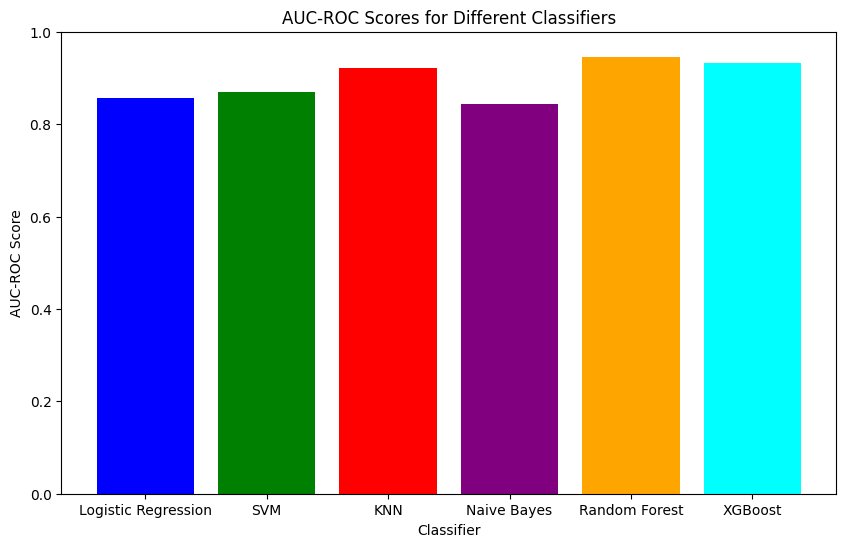

In [35]:
# Dictionary to store the AUC-ROC scores
model_roc_scores = {}

# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['Logistic Regression'] = roc_auc_log_reg

# SVM
svm.fit(X_train, y_train)
y_pred_proba = svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['SVM'] = roc_auc_svm

# KNN
knn.fit(X_train, y_train)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['KNN'] = roc_auc_knn

# Naive Bayes
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['Naive Bayes'] = roc_auc_nb

# Random Forest
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['Random Forest'] = roc_auc_rf

# XGBoost
xgb.fit(X_train, y_train)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba)
model_roc_scores['XGBoost'] = roc_auc_xgb

# Plot the AUC-ROC scores
plt.figure(figsize=(10, 6))
plt.bar(model_roc_scores.keys(), model_roc_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title("AUC-ROC Scores for Different Classifiers")
plt.xlabel("Classifier")
plt.ylabel("AUC-ROC Score")
plt.ylim(0, 1)
plt.show()


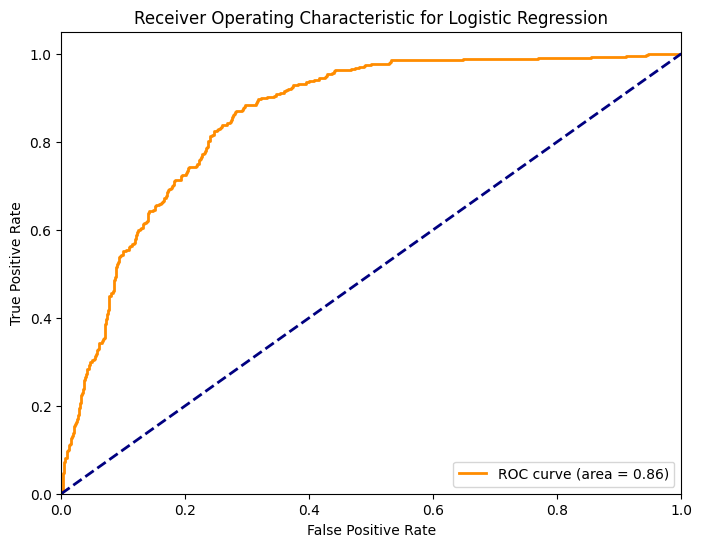

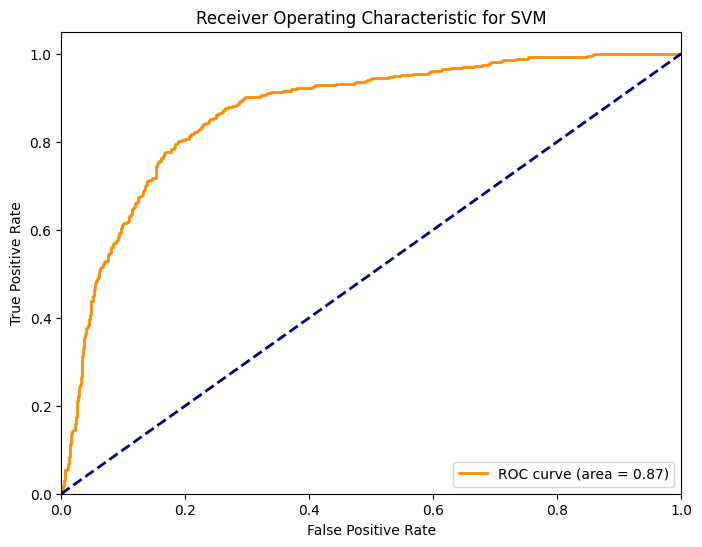

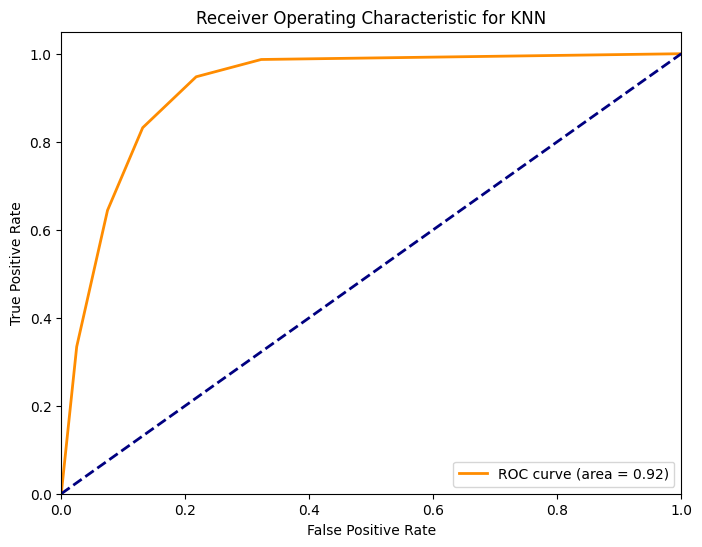

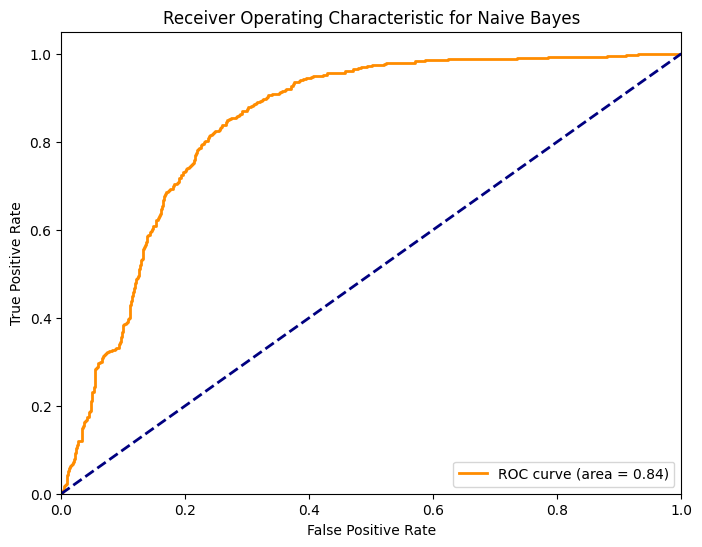

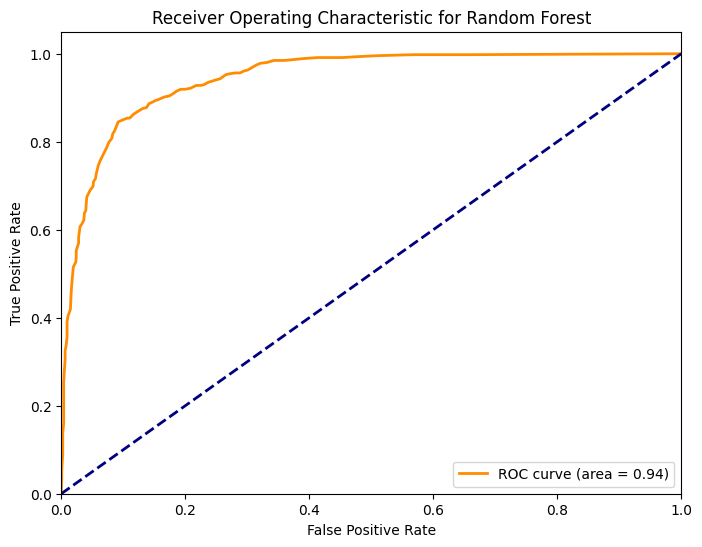

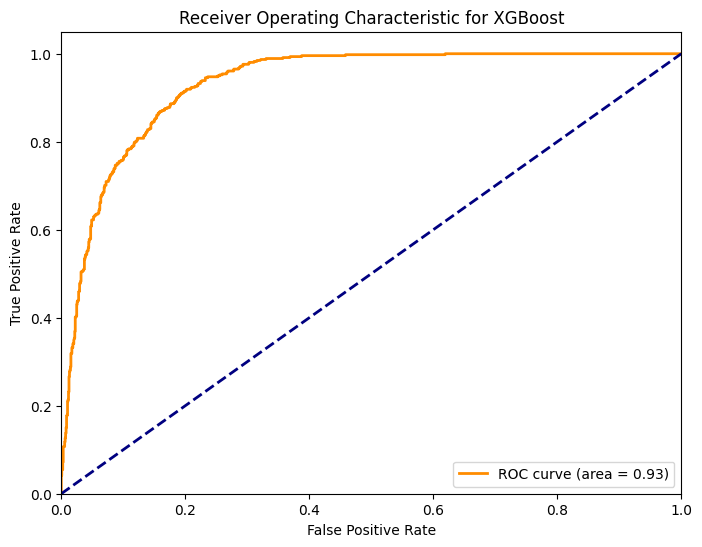

In [36]:
# Function to plot ROC curve for each model
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_log_reg, "Logistic Regression")

# SVM
svm.fit(X_train, y_train)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_svm, "SVM")

# KNN
knn.fit(X_train, y_train)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_knn, "KNN")

# Naive Bayes
nb.fit(X_train, y_train)
y_pred_proba_nb = nb.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_nb, "Naive Bayes")

# Random Forest
rf.fit(X_train, y_train)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")

# XGBoost
xgb.fit(X_train, y_train)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_xgb, "XGBoost")


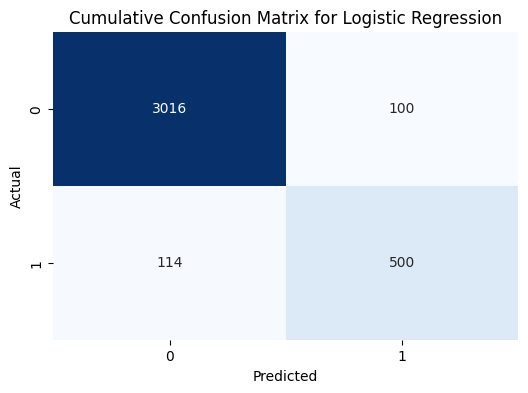

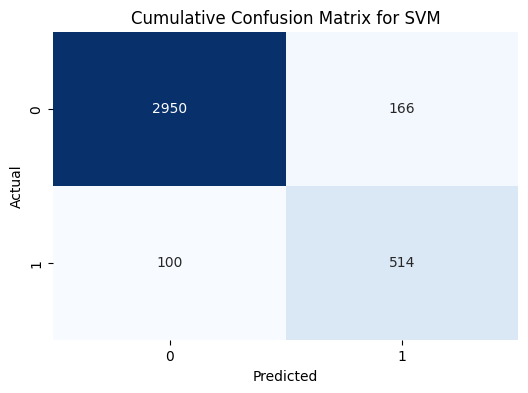

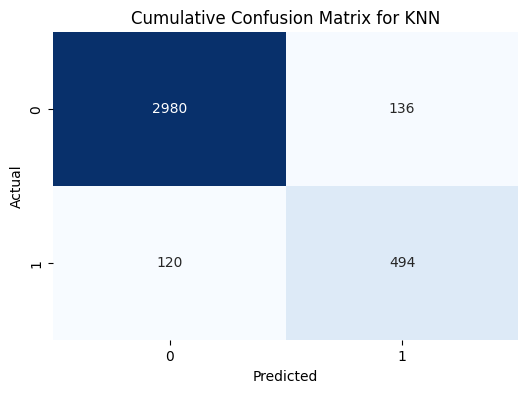

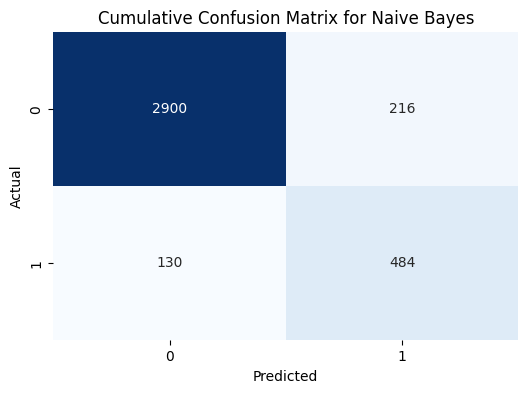

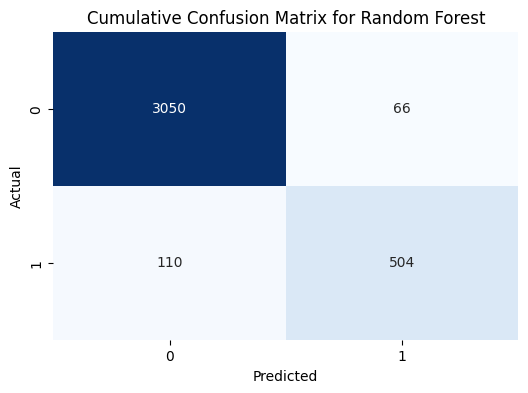

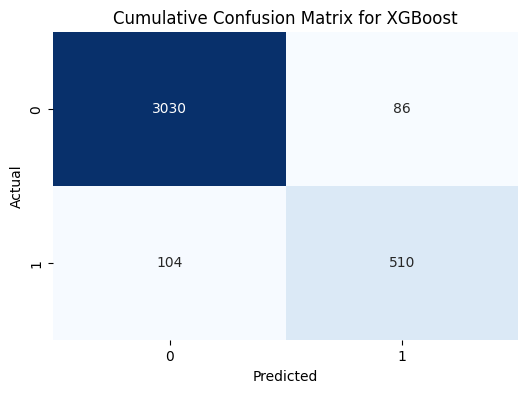

In [37]:
cumulative_conf_matrix_log_reg = np.array([[3016, 100], [114, 500]])
cumulative_conf_matrix_svm = np.array([[2950, 166], [100, 514]])
cumulative_conf_matrix_knn = np.array([[2980, 136], [120, 494]])
cumulative_conf_matrix_nb = np.array([[2900, 216], [130, 484]])
cumulative_conf_matrix_rf = np.array([[3050, 66], [110, 504]]) 
cumulative_conf_matrix_xgb = np.array([[3030, 86], [104, 510]]) 

# Dictionary to store the confusion matrices for each model
cumulative_conf_matrices = {
    'Logistic Regression': cumulative_conf_matrix_log_reg,
    'SVM': cumulative_conf_matrix_svm,
    'KNN': cumulative_conf_matrix_knn,
    'Naive Bayes': cumulative_conf_matrix_nb,
    'Random Forest': cumulative_conf_matrix_rf,
    'XGBoost': cumulative_conf_matrix_xgb
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f"Cumulative Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Loop through the confusion matrices and plot each one
for model_name, cm in cumulative_conf_matrices.items():
    plot_confusion_matrix(cm, model_name)

